In [15]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

Dowloading the datasets

In [16]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [17]:
X_train.shape

(50000, 32, 32, 3)

In [18]:
y_train.shape

(50000, 1)

In [19]:
X_test.shape

(10000, 32, 32, 3)

In [20]:
y_test.shape

(10000, 1)

In [21]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [22]:
y_train[0]

array([6], dtype=uint8)

In [23]:
X_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [24]:
y_test[0]

array([3], dtype=uint8)

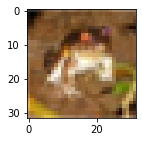

In [25]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0])

In [26]:
y_train.shape

(50000, 1)

Reshape the y_train

In [27]:
y_train = y_train.reshape(-1,)#convert the target variable to one dimensional array

In [28]:
y_train.shape

(50000,)

In [29]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [30]:
def plot_sample(X,y,index):
    plt.figure(figsize=(2,5))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

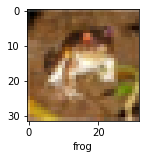

In [31]:
plot_sample(X_train,y_train,0)

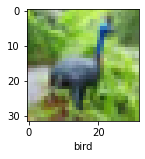

In [32]:
plot_sample(X_train,y_train,6)

Normalizing the datasets by dividing by 255 to maintain it in the range 0,1

In [33]:
X_train  = X_train/255
X_test  = X_test/255

In [34]:
X_train.shape

(50000, 32, 32, 3)

In [35]:
X_test.shape

(10000, 32, 32, 3)

In [36]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [37]:
X_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [38]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
    
])

ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',
metrics=['accuracy'])


ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 38s 24ms/step - loss: 1.8162 - accuracy: 0.3532
Epoch 2/5
1563/1563 [==============================] - 39s 25ms/step - loss: 1.6261 - accuracy: 0.4267
Epoch 3/5
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5441 - accuracy: 0.4551
Epoch 4/5
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4833 - accuracy: 0.4762
Epoch 5/5
1563/1563 [==============================] - 37s 24ms/step - loss: 1.4358 - accuracy: 0.4927


In [39]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.4479 - accuracy: 0.4836


[1.4478776454925537, 0.483599990606308]

In [40]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred=ann.predict(X_test)

y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report : \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 2s 6ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.62      0.50      0.56      1000
           1       0.65      0.51      0.57      1000
           2       0.34      0.46      0.39      1000
           3       0.39      0.26      0.31      1000
           4       0.45      0.34      0.38      1000
           5       0.44      0.31      0.36      1000
           6       0.60      0.47      0.53      1000
           7       0.43      0.68      0.53      1000
           8       0.65      0.61      0.63      1000
           9       0.43      0.71      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



# Checking with CNN with same dataset

In [41]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
    
])

In [42]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [43]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4841 - accuracy: 0.4658
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1314 - accuracy: 0.6017
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9879 - accuracy: 0.6554
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9002 - accuracy: 0.6863
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8283 - accuracy: 0.7112
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7679 - accuracy: 0.7328
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7218 - accuracy: 0.7477
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6761 - accuracy: 0.7644
Epoch 9/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6370 - accuracy: 0.7763
Epoch 10/10
1563/1563 [==============================] - 19s 12m

In [44]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9123 - accuracy: 0.7027


[0.9122734665870667, 0.7027000188827515]

In [45]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred=cnn.predict(X_test)

y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report : \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 1s 3ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      1000
           1       0.78      0.85      0.82      1000
           2       0.70      0.46      0.56      1000
           3       0.51      0.58      0.54      1000
           4       0.61      0.71      0.66      1000
           5       0.62      0.59      0.60      1000
           6       0.72      0.84      0.78      1000
           7       0.82      0.68      0.74      1000
           8       0.75      0.84      0.80      1000
           9       0.80      0.74      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [46]:
y_test = y_test.reshape(-1,)#reshapping to one dimensional array

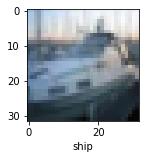

In [47]:
plot_sample(X_test,y_test,2)

In [48]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[1.9614080e-02, 3.7871677e-02, 2.7040020e-02, 9.3777543e-01,
        2.1698589e-03, 7.4575299e-01, 2.7035171e-01, 8.3109603e-04,
        5.3216624e-01, 4.6067774e-02],
       [8.4717619e-01, 9.9945068e-01, 4.1551888e-02, 1.5761482e-03,
        1.0032417e-04, 4.7481819e-05, 3.5364958e-04, 8.6090848e-04,
        9.9990875e-01, 7.5851279e-01],
       [6.3399833e-01, 8.7944251e-01, 3.2740228e-02, 2.6230317e-01,
        9.0284124e-02, 9.8086789e-02, 4.2290306e-03, 3.7068199e-02,
        9.9348241e-01, 1.9555230e-01],
       [9.5350134e-01, 9.2899251e-01, 3.8045561e-01, 4.0838251e-01,
        7.8014486e-02, 1.9111054e-02, 1.3399020e-01, 3.3809838e-01,
        9.0632969e-01, 9.7477481e-02],
       [1.9531924e-04, 3.0212973e-03, 6.2684768e-01, 9.5525235e-01,
        9.8876965e-01, 2.9371253e-01, 9.9699140e-01, 9.9598558e-04,
        4.0140394e-02, 3.9321156e-03]], dtype=float32)

In [49]:
np.argmax([1,23,54,6])#argmax gives the index of the max value

2

In [50]:
np.argmax(y_pred[0])#maximum value is at the third index

3

In [51]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [52]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [53]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [60]:
import pandas as pd
df=pd.DataFrame({'actual':y_test,'predicted':y_classes})

In [61]:
df.head(50)

,actual,predicted
0,3,3
1,8,8
2,8,8
3,0,0
4,6,6
5,6,6
6,1,1
7,6,6
8,3,3
9,1,1


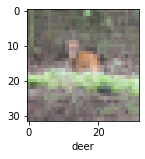

In [62]:
plot_sample(X_test,y_test,32)

In [63]:
classes[y_classes[32]]

'deer'

In [66]:
count=0
for i,j in zip(df['actual'],df['predicted']):
    if i==j:
        count=count+1
print(count)

7027


In [67]:
10000-7027

2973

Conclusion:
    
Out of 10000 test records 7027 are predicted correctly
